In [10]:
#STANDARD BASIC LIBRARY
import pandas as pd
import numpy as np
import sys
import sklearn
import matplotlib.pyplot as plt

#DATA TRANSFORMATION
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

#DATA NORMALIZATION
from sklearn import preprocessing

#FEATURE SELECTION
#ANNOVA f-TEST
from sklearn.feature_selection import SelectPercentile, f_classif
from sklearn.model_selection import StratifiedKFold

#MODEL BASED
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier

#RECURSIVE FEATURE ELIMINATION
from sklearn.feature_selection import RFE, RFECV

#CLASSIFIER
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestClassifier

#METHOD EVALUATION
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.metrics import sensitivity_specificity_support
from sklearn.model_selection import cross_val_score
from sklearn import metrics

from statistics import mean 
from sklearn.model_selection import ParameterGrid, StratifiedKFold

import time

Using TensorFlow backend.


In [2]:
df = pd.read_csv("UNSW/UNSW_NB15_training-set.csv")
df_test = pd.read_csv("UNSW/UNSW_NB15_testing-set.csv")

In [3]:
df.drop('id', axis=1, inplace=True)
df.drop('attack_cat', axis=1, inplace=True)
df_test.drop('id', axis=1, inplace=True)
df_test.drop('attack_cat', axis=1, inplace=True)

In [4]:
categorical_columns = ['proto', 'service', 'state']
df_categorical_values = df[categorical_columns]
testdf_categorical_values = df_test[categorical_columns]
df_categorical_values.head()

,proto,service,state
0,tcp,-,FIN
1,tcp,-,FIN
2,tcp,-,FIN
3,tcp,ftp,FIN
4,tcp,-,FIN


In [5]:
#proto
unique_proto = sorted(df.proto.unique())
string1 = 'proto_'
unique_proto2 = [string1 + x for x in unique_proto]

#service
unique_service=sorted(df.service.unique())
string2 = 'service_'
unique_service2=[string2 + x for x in unique_service]

#state
unique_state = sorted(df.state.unique())
string3 = 'state_'
unique_state2 = [string3 + x for x in unique_state]

#create dummies column
dumcols = unique_proto2 + unique_service2 + unique_state2
print(dumcols)

['proto_3pc', 'proto_a/n', 'proto_aes-sp3-d', 'proto_any', 'proto_argus', 'proto_aris', 'proto_arp', 'proto_ax.25', 'proto_bbn-rcc', 'proto_bna', 'proto_br-sat-mon', 'proto_cbt', 'proto_cftp', 'proto_chaos', 'proto_compaq-peer', 'proto_cphb', 'proto_cpnx', 'proto_crtp', 'proto_crudp', 'proto_dcn', 'proto_ddp', 'proto_ddx', 'proto_dgp', 'proto_egp', 'proto_eigrp', 'proto_emcon', 'proto_encap', 'proto_etherip', 'proto_fc', 'proto_fire', 'proto_ggp', 'proto_gmtp', 'proto_gre', 'proto_hmp', 'proto_i-nlsp', 'proto_iatp', 'proto_ib', 'proto_icmp', 'proto_idpr', 'proto_idpr-cmtp', 'proto_idrp', 'proto_ifmp', 'proto_igmp', 'proto_igp', 'proto_il', 'proto_ip', 'proto_ipcomp', 'proto_ipcv', 'proto_ipip', 'proto_iplt', 'proto_ipnip', 'proto_ippc', 'proto_ipv6', 'proto_ipv6-frag', 'proto_ipv6-no', 'proto_ipv6-opts', 'proto_ipv6-route', 'proto_ipx-n-ip', 'proto_irtp', 'proto_isis', 'proto_iso-ip', 'proto_iso-tp4', 'proto_kryptolan', 'proto_l2tp', 'proto_larp', 'proto_leaf-1', 'proto_leaf-2', 'proto

In [6]:
#proto
unique_proto_test = sorted(df_test.proto.unique())
string1_test = 'proto_'
unique_proto2_test = [string1_test + x for x in unique_proto_test]

#service
unique_service_test=sorted(df_test.service.unique())
string2_test = 'service_'
unique_service2_test=[string2_test + x for x in unique_service_test]

#state
unique_state_test = sorted(df_test.state.unique())
string3_test = 'state_'
unique_state2_test = [string3_test + x for x in unique_state_test]

#create dummies column
dumcols_test = unique_proto2_test + unique_service2_test + unique_state2_test
print(dumcols_test)

['proto_3pc', 'proto_a/n', 'proto_aes-sp3-d', 'proto_any', 'proto_argus', 'proto_aris', 'proto_arp', 'proto_ax.25', 'proto_bbn-rcc', 'proto_bna', 'proto_br-sat-mon', 'proto_cbt', 'proto_cftp', 'proto_chaos', 'proto_compaq-peer', 'proto_cphb', 'proto_cpnx', 'proto_crtp', 'proto_crudp', 'proto_dcn', 'proto_ddp', 'proto_ddx', 'proto_dgp', 'proto_egp', 'proto_eigrp', 'proto_emcon', 'proto_encap', 'proto_etherip', 'proto_fc', 'proto_fire', 'proto_ggp', 'proto_gmtp', 'proto_gre', 'proto_hmp', 'proto_i-nlsp', 'proto_iatp', 'proto_ib', 'proto_idpr', 'proto_idpr-cmtp', 'proto_idrp', 'proto_ifmp', 'proto_igmp', 'proto_igp', 'proto_il', 'proto_ip', 'proto_ipcomp', 'proto_ipcv', 'proto_ipip', 'proto_iplt', 'proto_ipnip', 'proto_ippc', 'proto_ipv6', 'proto_ipv6-frag', 'proto_ipv6-no', 'proto_ipv6-opts', 'proto_ipv6-route', 'proto_ipx-n-ip', 'proto_irtp', 'proto_isis', 'proto_iso-ip', 'proto_iso-tp4', 'proto_kryptolan', 'proto_l2tp', 'proto_larp', 'proto_leaf-1', 'proto_leaf-2', 'proto_merit-inp', '

In [7]:
df_categorical_values_enc = df_categorical_values.apply(LabelEncoder().fit_transform)
testdf_categorical_values_enc = testdf_categorical_values.apply(LabelEncoder().fit_transform)
print(df_categorical_values_enc.head())

   proto  service  state
0    113        0      2
1    113        0      2
2    113        0      2
3    113        3      2
4    113        0      2


In [8]:
enc = OneHotEncoder()
#Training dataset
df_categorical_values_encenc = enc.fit_transform(df_categorical_values_enc)
df_cat_data = pd.DataFrame(df_categorical_values_encenc.toarray(), columns = dumcols)

#testing dataset
testdf_categorical_values_encenc = enc.fit_transform(testdf_categorical_values_enc)
testdf_cat_data = pd.DataFrame(testdf_categorical_values_encenc.toarray(), columns=dumcols_test)

In [9]:
print(df_cat_data.shape)
print(testdf_cat_data.shape)

(175341, 155)
(82332, 151)


In [10]:
# trainproto=df['proto'].tolist()
# testproto=df_test['proto'].tolist()
# differenceproto=list(set(trainproto)-set(testproto))
# stringS = 'proto_'
# differenceproto = [stringS + x for x in differenceproto]
# differenceproto

In [11]:
# for col in differenceproto:
#     testdf_cat_data[col] = 0

In [12]:
trainstate=df['state'].tolist()
teststate=df_test['state'].tolist()
differencestate=list(set(trainstate)-set(teststate))
stringSt = 'state_'
differencestate = [stringSt + x for x in differencestate]
differencestate

['state_PAR', 'state_URN', 'state_ECO', 'state_no']

In [13]:
for col in differencestate:
    testdf_cat_data[col] = 0

In [14]:
print(df_cat_data.shape)
print(testdf_cat_data.shape)

(175341, 155)
(82332, 155)


In [15]:
#train data
newdf = df.join(df_cat_data)
newdf.drop('proto', axis=1, inplace=True)
newdf.drop('service', axis=1, inplace=True)
newdf.drop('state', axis=1, inplace=True)

#test data
newdf_test = df_test.join(testdf_cat_data)
newdf_test.drop('proto', axis=1, inplace=True)
newdf_test.drop('service', axis=1, inplace=True)
newdf_test.drop('state', axis=1, inplace=True)

print(newdf.shape)
print(newdf_test.shape)

(175341, 195)
(82332, 195)


In [16]:
newdf.head()

,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,...,service_ssl,state_CON,state_ECO,state_FIN,state_INT,state_PAR,state_REQ,state_RST,state_URN,state_no
0,0.121478,6,4,258,172,74.087490,252,254,14158.942380,8495.365234,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.649902,14,38,734,42014,78.473372,62,252,8395.112305,503571.312500,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.623129,8,16,364,13186,14.170161,62,252,1572.271851,60929.230470,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.681642,12,12,628,770,13.677108,62,252,2740.178955,3358.622070,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.449454,10,6,534,268,33.373826,254,252,8561.499023,3987.059814,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
newdf['label'].value_counts()

1    119341
0     56000
Name: label, dtype: int64

In [18]:
newdf_test['label'].value_counts()

1    45332
0    37000
Name: label, dtype: int64

In [19]:
x_df = newdf.drop('label',1)
y_df = newdf.label
x_df_test = newdf_test.drop('label',1)
y_df_test = newdf_test.label

In [20]:
colNames=list(x_df)
colNames_test=list(x_df_test)

In [21]:
scaler1 = preprocessing.StandardScaler().fit(x_df)
x_df = scaler1.transform(x_df)
scaler2 = preprocessing.StandardScaler().fit(x_df_test)
x_df_test = scaler2.transform(x_df_test)

In [22]:
from sklearn.tree import DecisionTreeClassifier
start1 = time.time()
clf = DecisionTreeClassifier(random_state=0)
clf.fit(x_df, y_df)
y_pred = clf.predict(x_df_test)
time1 = (time.time()-start1)

In [23]:
cm_all = confusion_matrix(y_df_test, y_pred)
print(pd.crosstab(y_df_test, y_pred, rownames=['Actual activity'], colnames=['Predicted activity']))
TP_all = cm_all[1][1]
FN_all = cm_all[1][0]
FP_all = cm_all[0][1]
TN_all = cm_all[0][0]
acc_all = (TP_all+TN_all)/(TP_all+TN_all+FP_all+FN_all)
sen_all = TP_all/(TP_all+FN_all)
spe_all = TN_all/(TN_all+FP_all)
fal_all = FP_all/(FP_all+TN_all)
print("Accuracy all features : ", acc_all)
print("Sensitivity all features : ", sen_all)
print("Specificity all features :", spe_all)
print("False Alarm rate all features : ", fal_all)
print("Computation time all features : ", time1)

Predicted activity      0      1
Actual activity                 
0                   26141  10859
1                   16554  28778
Accuracy all features :  0.6670431909828499
Sensitivity all features :  0.6348274949263214
Specificity all features : 0.7065135135135135
False Alarm rate all features :  0.2934864864864865
Computation time all features :  4.635051488876343


Feature importance of DoS : 
0.6751062684451101
0.06133421958479836
0.047759947728968626
0.03266138274769058
0.01605583064007574
0.010092142713906368
0.010013757959055567
0.00999495252881726
0.00978634038579304
0.00976459711160334
0.009733264473134978
0.009076724986749989
0.00875622801584691
0.008628935852274571
0.007699578547458444
0.0066395375236443155
0.006402142286261502
0.006341782846574066
0.0062682079534938685
0.006002402530373979
0.005559780773568554
0.0055129061317651966
0.005472053593360676
0.005333375236937554
0.004970787782139715
0.004154630056318237
0.0021928749866860805
0.002026281561544384
0.0015836552658530865
0.0010017725321590095
0.0005874521849285066
0.0005830359324796844
0.0005576769527777333
0.00047351240083074776
0.0004509575484770912
0.00034217845111720864
0.00026932706810882303
0.0002178837230257608
0.000204523518612603
0.00012518339362498182
7.082860674055704e-05
4.461670394140936e-05
4.268225589945135e-05
2.8569048481426407e-05
2.6454237369077313e-05
2.1695238

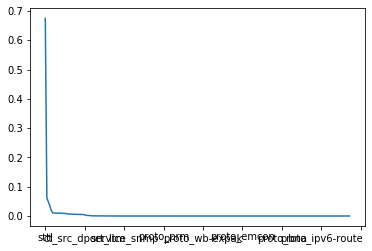

In [24]:
n = 195
model = DecisionTreeClassifier(random_state=0)
#DoS
model.fit(x_df,y_df)
feat_importances = pd.Series(model.feature_importances_, index=colNames)
feat_importances.nlargest(n).plot(kind='line')
print("Feature importance of DoS : ")
for x in feat_importances.nlargest(n):
    print(x)
plt.show()

In [25]:
pd.set_option('display.max_rows', None)
print(feat_importances)

dur                  5.472054e-03
spkts                4.735124e-04
dpkts                1.583655e-03
sbytes               4.775995e-02
dbytes               5.512906e-03
rate                 5.333375e-03
sttl                 6.751063e-01
dttl                 2.645424e-05
sload                9.786340e-03
dload                8.628936e-03
sloss                6.268208e-03
dloss                1.001773e-03
sinpkt               1.009214e-02
dinpkt               6.639538e-03
sjit                 5.559781e-03
djit                 7.699579e-03
swin                 0.000000e+00
stcpb                9.994953e-03
dtcpb                9.764597e-03
dwin                 0.000000e+00
tcprtt               9.733264e-03
synack               1.001376e-02
ackdat               9.076725e-03
smean                3.266138e-02
dmean                6.341783e-03
trans_depth          5.830359e-04
response_body_len    5.874522e-04
ct_srv_src           1.605583e-02
ct_state_ttl         1.318635e-05
ct_dst_ltm    

In [26]:
from statistics import median

feat_value = []
Im = []
#create list of importance value
for i in range(0,194,1):
  feat_value.append(feat_importances[i])

#delete non zero
#create threshold from median value 
val_nonzero = [x for x in feat_value if x != 0]
thres = median(val_nonzero)

#remove feature below threhsold
for j in range(0,194,1):
  if(feat_value[j] > thres): 
    Im.append(j)

#calculate how many features
n_feat = len(Im)

In [27]:
n_feat

25

In [28]:
# param_grid = {'n_features':[i for i in range(1,n_feat+1,1)]}

# #DoS
# cv_res=[]
# for params in ParameterGrid(param_grid):
#     cv_folds = []
        
#     dcs = DecisionTreeClassifier(random_state=0)
#     rfe_grid = RFE(estimator=dcs, n_features_to_select=params['n_features'], step=1)
#     rfe_grid.fit(x_df, y_df)
        
#     cv_folds.append(rfe_grid.score(x_df_test, y_df_test))
    
#     cv_res.append(np.mean(cv_folds))
#     print("combination of parameters: " + str(params) + " ended ")


In [29]:
# max_rfe = cv_res[0]
# for f in range(0,len(cv_res),1):
#     if cv_res[f] > max_rfe:
#       max_rfe = cv_res[f]
#       ind_max = f+1
# print("Best score RFE : ",max_rfe)
# print("Number of selected features : ", ind_max)

In [31]:
# for x in cv_res:
#     print(x)

In [32]:
# cv_res

In [33]:
est = DecisionTreeClassifier(random_state=0)
#rfe = RFE(estimator=est, n_features_to_select=ind_max, step=1)
rfe = RFE(estimator=est, n_features_to_select=11, step=1)
rfe.fit(x_df, y_df)
X_rfe = rfe.transform(x_df)
true=rfe.support_
rfecolindex=[i for i, x in enumerate(true) if x]
rfecolname=list(colNames[i] for i in rfecolindex)

print('Features selected for DoS:',rfecolname)
print()
print(X_rfe.shape)

Features selected for DoS: ['sbytes', 'sttl', 'sload', 'sinpkt', 'dinpkt', 'stcpb', 'tcprtt', 'synack', 'smean', 'ct_srv_src', 'ct_srv_dst']

(175341, 11)


In [34]:
x_df_test2=x_df_test[:,rfecolindex]
start2 = time.time()
clf_rfe = DecisionTreeClassifier(random_state=0)
clf_rfe.fit(X_rfe, y_df)
Y_pred2 = clf_rfe.predict(x_df_test2)
time2 = (time.time()-start2)

In [35]:
cm_df_rfe = confusion_matrix(y_df_test, Y_pred2)
print(pd.crosstab(y_df_test, Y_pred2, rownames=['Actual activity'], colnames=['Predicted activity']))
TP_df_rfe = cm_df_rfe[1][1]
FN_df_rfe = cm_df_rfe[1][0]
FP_df_rfe = cm_df_rfe[0][1]
TN_df_rfe = cm_df_rfe[0][0]
acc_df_rfe = (TP_df_rfe+TN_df_rfe)/(TP_df_rfe+TN_df_rfe+FP_df_rfe+FN_df_rfe)
sen_df_rfe = TP_df_rfe/(TP_df_rfe+FN_df_rfe)
spe_df_rfe = TN_df_rfe/(TN_df_rfe+FP_df_rfe)
fal_df_rfe = FP_df_rfe/(FP_df_rfe+TN_df_rfe)
print("Accuracy df all features : ", acc_df_rfe)
print("Sensitivity df all features : ", sen_df_rfe)
print("Specificity df all features :", spe_df_rfe)
print("False Alarm rate df all features : ", fal_df_rfe)
print("Computation time df all features : ", time2)

Predicted activity      0      1
Actual activity                 
0                   26701  10299
1                   13317  32015
Accuracy df all features :  0.7131613467424573
Sensitivity df all features :  0.7062340068825553
Specificity df all features : 0.7216486486486486
False Alarm rate df all features :  0.27835135135135136
Computation time df all features :  1.114187240600586


In [42]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
rfe_pred = cross_val_predict(clf_rfe, x_df_test2, y_df_test, cv=10)
pd.crosstab(y_df_test, rfe_pred, rownames=['Actual attacks'], colnames=['Predicted attacks'])

Predicted attacks,0,1
Actual attacks,,
0,32177,4823
1,3668,41664


In [36]:
print("Dataset shapes before : ")
print(X_rfe.shape)
print(x_df_test2.shape)

from sklearn.neighbors import LocalOutlierFactor
model_lof = LocalOutlierFactor(n_neighbors = 300, contamination='auto')
model_lof.fit_predict(X_rfe)
lof_score = model_lof.negative_outlier_factor_

mean = np.mean(lof_score)
std = np.std(lof_score)
print('mean of the dataset is', mean) 
print('std. deviation is', std) 

Dataset shapes before : 
(175341, 11)
(82332, 11)
mean of the dataset is -18206647.23819287
std. deviation is 137375268.31015188


In [46]:
outlier_zscore = []
for i in lof_score:
    z_score = (i-mean)/std
    outlier_zscore.append(z_score)
    
outlier = []
thres = 3
index = []
for x in range(0,len(X_rfe),1):
    if abs(outlier_zscore[x]) > thres:
        outlier.append(outlier_zscore[x])
    elif abs(outlier_zscore[x]) < thres:
        #index non outlier data 
        index.append(x)

x_df_lof = X_rfe[index]
y_df_lof = y_df.iloc[index]

In [47]:
lof_pred = cross_val_predict(clf_lof, x_df_lof, y_df_lof, cv=10)
pd.crosstab(y_df_lof, lof_pred, rownames=['Actual attacks'], colnames=['Predicted attacks'])

Predicted attacks,0,1
Actual attacks,,
0,47530,8189
1,5964,112197


In [38]:
print(len(outlier))
print(len(index))

5742
169599


In [39]:
x_df_test2=x_df_test[:,rfecolindex]
start9 = time.time()
clf_lof = DecisionTreeClassifier(random_state=0)
clf_lof.fit(x_df_lof, y_df_lof)
y_df_pred_lof = clf_lof.predict(x_df_test2)
time9 = (time.time()-start9)

In [40]:
cm_R2L_lof = confusion_matrix(y_df_test, y_df_pred_lof)
print(pd.crosstab(y_df_test, y_df_pred_lof, rownames=['Actual activity'], colnames=['Predicted activity']))
TP_R2L_lof = cm_R2L_lof[1][1]
FN_R2L_lof = cm_R2L_lof[1][0]
FP_R2L_lof = cm_R2L_lof[0][1]
TN_R2L_lof = cm_R2L_lof[0][0]
acc_R2L_lof = (TP_R2L_lof+TN_R2L_lof)/(TP_R2L_lof+TN_R2L_lof+FP_R2L_lof+FN_R2L_lof)
sen_R2L_lof = TP_R2L_lof/(TP_R2L_lof+FN_R2L_lof)
spe_R2L_lof = TN_R2L_lof/(TN_R2L_lof+FP_R2L_lof)
fal_R2L_lof = FP_R2L_lof/(FP_R2L_lof+TN_R2L_lof)
print("Accuracy R2L all features : ", acc_R2L_lof)
print("Sensitivity R2L all features : ", sen_R2L_lof)
print("Specificity R2L all features :", spe_R2L_lof)
print("False Alarm rate R2L all features : ", fal_R2L_lof)
print("Computation time R2L all features : ", time9)

Predicted activity      0      1
Actual activity                 
0                   28072   8928
1                    8656  36676
Accuracy R2L all features :  0.7864256911043094
Sensitivity R2L all features :  0.8090532074472778
Specificity R2L all features : 0.7587027027027027
False Alarm rate R2L all features :  0.2412972972972973
Computation time R2L all features :  1.3175663948059082


In [48]:
x = 5
print(x)

5


In [11]:
col_names = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","label","difficulty-level"]

df = pd.read_csv("NSL-KDD/KDDTrain-.csv", header=None, names = col_names)
df_test = pd.read_csv("NSL-KDD/KDDTest-.csv", header=None, names = col_names)

df.drop(columns="difficulty-level", inplace=True)
df_test.drop(columns="difficulty-level",inplace=True)

categorical_columns=['protocol_type', 'service', 'flag']
df_categorical_values = df[categorical_columns]
testdf_categorical_values = df_test[categorical_columns]
df_categorical_values.head()

#protocol
unique_protocol=sorted(df.protocol_type.unique())
string1 = 'Protocol_type_'
unique_protocol2=[string1 + x for x in unique_protocol]

#service
unique_service=sorted(df.service.unique())
string2 = 'service_'
unique_service2=[string2 + x for x in unique_service]

#flag
unique_flag = sorted(df.flag.unique())
string3 = 'flag_'
unique_flag2 = [string3 + x for x in unique_flag]

#create dummies column
dumcols = unique_protocol2 + unique_service2 + unique_flag2
print(dumcols)

unique_service_test = sorted(df_test.service.unique())
unique_service2_test = [string2 + x for x in unique_service_test]
testdumcols = unique_protocol2 + unique_service2_test + unique_flag2

df_categorical_values_enc = df_categorical_values.apply(LabelEncoder().fit_transform)
print(df_categorical_values_enc.head())
#test
testdf_categorical_values_enc = testdf_categorical_values.apply(LabelEncoder().fit_transform)

enc = OneHotEncoder()
df_categorical_values_encenc = enc.fit_transform(df_categorical_values_enc)
df_cat_data = pd.DataFrame(df_categorical_values_encenc.toarray(), columns=dumcols)

#test set
testdf_categorical_values_encenc = enc.fit_transform(testdf_categorical_values_enc)
testdf_cat_data = pd.DataFrame(testdf_categorical_values_encenc.toarray(), columns=testdumcols)

trainservice=df['service'].tolist()
testservice=df_test['service'].tolist()
difference=list(set(trainservice)-set(testservice))
string = 'service_'
difference = [string + x for x in difference]
difference

['Protocol_type_icmp', 'Protocol_type_tcp', 'Protocol_type_udp', 'service_IRC', 'service_X11', 'service_Z39_50', 'service_aol', 'service_auth', 'service_bgp', 'service_courier', 'service_csnet_ns', 'service_ctf', 'service_daytime', 'service_discard', 'service_domain', 'service_domain_u', 'service_echo', 'service_eco_i', 'service_ecr_i', 'service_efs', 'service_exec', 'service_finger', 'service_ftp', 'service_ftp_data', 'service_gopher', 'service_harvest', 'service_hostnames', 'service_http', 'service_http_2784', 'service_http_443', 'service_http_8001', 'service_imap4', 'service_iso_tsap', 'service_klogin', 'service_kshell', 'service_ldap', 'service_link', 'service_login', 'service_mtp', 'service_name', 'service_netbios_dgm', 'service_netbios_ns', 'service_netbios_ssn', 'service_netstat', 'service_nnsp', 'service_nntp', 'service_ntp_u', 'service_other', 'service_pm_dump', 'service_pop_2', 'service_pop_3', 'service_printer', 'service_private', 'service_red_i', 'service_remote_job', 'serv

['service_red_i',
 'service_http_2784',
 'service_urh_i',
 'service_http_8001',
 'service_harvest',
 'service_aol']

In [12]:
for col in difference:
    testdf_cat_data[col] = 0

testdf_cat_data.shape

(22544, 84)

In [13]:
#train data
newdf=df.join(df_cat_data)
newdf.drop('flag', axis=1, inplace=True)
newdf.drop('protocol_type',axis=1, inplace=True)
newdf.drop('service',axis=1, inplace=True)
#newdf.drop('difficulty-level',axis=1, inplace=True)

#test data
newdf_test = df_test.join(testdf_cat_data)
newdf_test.drop('flag', axis=1, inplace=True)
newdf_test.drop('protocol_type',axis=1, inplace=True)
newdf_test.drop('service',axis=1, inplace=True)
#newdf_test.drop('difficulty-level',axis=1, inplace=True)

print(newdf.shape)
print(newdf_test.shape)

(125973, 123)
(22544, 123)


In [14]:
#take label column
labeldf=newdf['label']
labeldf_test=newdf_test['label']

#change the label column
newlabeldf=labeldf.replace({ 'normal' : 0, 'neptune' : 1 ,'back': 1, 'land': 1, 'pod': 1, 'smurf': 1, 'teardrop': 1,'mailbomb': 1, 'apache2': 1, 'processtable': 1, 'udpstorm': 1, 'worm': 1,'ipsweep' : 1,'nmap' : 1,'portsweep' : 1,'satan' : 1,'mscan' : 1,'saint' : 1,'ftp_write': 1,'guess_passwd': 1,'imap': 1,'multihop': 1,'phf': 1,'spy': 1,'warezclient': 1,'warezmaster': 1,'sendmail': 1,'named': 1,'snmpgetattack': 1,'snmpguess': 1,'xlock': 1,'xsnoop': 1,'httptunnel': 1,'buffer_overflow': 1,'loadmodule': 1,'perl': 1,'rootkit': 1,'ps': 1,'sqlattack': 1,'xterm': 1})

newlabeldf_test=labeldf_test.replace({ 'normal' : 0, 'neptune' : 1 ,'back': 1, 'land': 1, 'pod': 1, 'smurf': 1, 'teardrop': 1,'mailbomb': 1, 'apache2': 1, 'processtable': 1, 'udpstorm': 1, 'worm': 1,'ipsweep' : 1,'nmap' : 1,'portsweep' : 1,'satan' : 1,'mscan' : 1,'saint' : 1,'ftp_write': 1,'guess_passwd': 1,'imap': 1,'multihop': 1,'phf': 1,'spy': 1,'warezclient': 1,'warezmaster': 1,'sendmail': 1,'named': 1,'snmpgetattack': 1,'snmpguess': 1,'xlock': 1,'xsnoop': 1,'httptunnel': 1,'buffer_overflow': 1,'loadmodule': 1,'perl': 1,'rootkit': 1,'ps': 1,'sqlattack': 1,'xterm': 1})

#put the new label column back
newdf['label'] = newlabeldf
newdf_test['label'] = newlabeldf_test
print(newdf['label'].head())

0    0
1    0
2    1
3    0
4    0
Name: label, dtype: int64


In [15]:
#create subset
to_drop = [0,1]
#train set
df_train = newdf[newdf['label'].isin(to_drop)]

#test set
df_test = newdf_test[newdf_test['label'].isin(to_drop)]

#split dataframe into X dan Y
#train set
df_x = df_train.drop('label',1)
df_y = df_train.label

#test set
df_x_test = df_test.drop('label',1)
df_y_test = df_test.label

colNames=list(df_x)
colNames_test=list(df_x_test)

#data normalization
#train
scaler = preprocessing.StandardScaler().fit(df_x)
df_x = scaler.transform(df_x)

#test
scaler1 = preprocessing.StandardScaler().fit(df_x_test)
df_x_test = scaler1.transform(df_x_test)

In [16]:
X_DoS = df_x
Y_DoS = df_y
X_DoS_test = df_x_test
Y_DoS_test = df_y_test

In [17]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

In [18]:
start1 = time.time()
clf_DoS = DecisionTreeClassifier(random_state=0)
clf_DoS.fit(X_DoS, Y_DoS)
Y_DoS_pred = clf_DoS.predict(X_DoS_test)
time1 = (time.time()-start1)

In [19]:
cm_dos_all = confusion_matrix(Y_DoS_test, Y_DoS_pred)
print(pd.crosstab(Y_DoS_test, Y_DoS_pred, rownames=['Actual activity'], colnames=['Predicted activity']))
TP_dos_all = cm_dos_all[1][1]
FN_dos_all = cm_dos_all[1][0]
FP_dos_all = cm_dos_all[0][1]
TN_dos_all = cm_dos_all[0][0]
acc_dos_all = (TP_dos_all+TN_dos_all)/(TP_dos_all+TN_dos_all+FP_dos_all+FN_dos_all)
sen_dos_all = TP_dos_all/(TP_dos_all+FN_dos_all)
spe_dos_all = TN_dos_all/(TN_dos_all+FP_dos_all)
fal_dos_all = FP_dos_all/(FP_dos_all+TN_dos_all)
print("Accuracy DoS all features : ", acc_dos_all)
print("Sensitivity DoS all features : ", sen_dos_all)
print("Specificity DoS all features :", spe_dos_all)
print("False Alarm rate DoS all features : ", fal_dos_all)
print("Computation time DoS all features : ", time1)

Predicted activity     0      1
Actual activity                
0                   1188   8523
1                   1699  11134
Accuracy DoS all features :  0.5465755855216465
Sensitivity DoS all features :  0.8676069508298917
Specificity DoS all features : 0.12233549582947173
False Alarm rate DoS all features :  0.8776645041705282
Computation time DoS all features :  2.4707703590393066


Feature importance of DoS : 
0.7394154560419852
0.07537443951799273
0.05637063326015499
0.03045536250954974
0.022175283068423604
0.021561302151641558
0.01021237166804439
0.007153156775607419
0.004392896490987885
0.004360636448703302
0.0037442519043619834
0.003646820451129994
0.0033712725691978766
0.0021640547891002572
0.0016286926913924064
0.0015150555545468852
0.0014461093098401263
0.001209270706834527
0.0010431774435765415
0.0010025689546886583
0.00098379848320088
0.0008951246005138581
0.0007766601544543396
0.0007586124056717073
0.0007120714895164257
0.00045270034697481054
0.0003107468172729137
0.00027596999940974657
0.00025233611752870284
0.00017525232054497696
0.00015902646160888525
0.0001359294083041774
0.00013129310139614332
0.00012598920698859485
0.00012106816370982827
0.00011370688085352484
9.563967895493382e-05
9.481733643984884e-05
9.469776995874789e-05
9.148436280656254e-05
8.015590073156328e-05
8.010603946750764e-05
7.087262857010327e-05
6.363383051761175e-05
6.348104036831

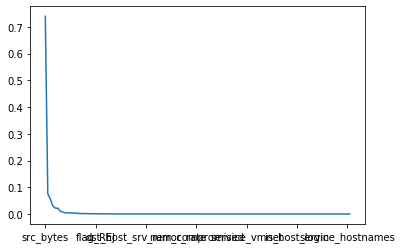

In [20]:
n = 122
model_DoS = DecisionTreeClassifier(random_state=0)
#DoS
model_DoS.fit(X_DoS,Y_DoS)
feat_importances = pd.Series(model_DoS.feature_importances_, index=colNames)
feat_importances.nlargest(n).plot(kind='line')
print("Feature importance of DoS : ")
for x in feat_importances.nlargest(n):
    print(x)
plt.show()

In [21]:
pd.set_option('display.max_rows', None)
print(feat_importances)

duration                       0.003744
src_bytes                      0.739415
dst_bytes                      0.022175
land                           0.000000
wrong_fragment                 0.000000
urgent                         0.000000
hot                            0.021561
num_failed_logins              0.000039
logged_in                      0.010212
num_compromised                0.000022
root_shell                     0.000032
su_attempted                   0.000000
num_root                       0.000032
num_file_creations             0.000046
num_shells                     0.000121
num_access_files               0.000095
num_outbound_cmds              0.000000
is_host_login                  0.000000
is_guest_login                 0.000055
count                          0.002164
srv_count                      0.000126
serror_rate                    0.000712
srv_serror_rate                0.000000
rerror_rate                    0.000061
srv_rerror_rate                0.000024


In [22]:
from statistics import median

feat_dos_value = []
dosIm = []
#create list of importance value
for i in range(0,122,1):
  feat_dos_value.append(feat_importances[i])

#delete non zero
#create threshold from median value 
dos_nonzero = [x for x in feat_dos_value if x != 0]
thres = median(dos_nonzero)

#remove feature below threhsold
for j in range(0,122,1):
  if(feat_dos_value[j] > thres): 
    dosIm.append(j)

#calculate how many features
n_dos_feat = len(dosIm)

In [ ]:
# param_grid = {'n_features':[i for i in range(1,n_dos_feat+1,1)]}

# #DoS
# cv_res_dos=[]
# for params in ParameterGrid(param_grid):
#     cv_folds = []
        
#     dcs = DecisionTreeClassifier(random_state=0)
#     rfe_grid = RFE(estimator=dcs, n_features_to_select=params['n_features'], step=1)
#     rfe_grid.fit(X_DoS, Y_DoS)
        
#     cv_folds.append(rfe_grid.score(X_DoS_test, Y_DoS_test))
    
#     cv_res_dos.append(np.mean(cv_folds))
#     print("combination of parameters: " + str(params) + " ended ")


In [ ]:
# max_rfe_dos = cv_res_dos[0]
# for f in range(0,len(cv_res_dos),1):
#     if cv_res_dos[f] > max_rfe_dos:
#       max_rfe_dos = cv_res_dos[f]
#       ind_max_dos = f+1
# print("Best score RFE : ",max_rfe_dos)
# print("Number of selected features : ", ind_max_dos)

In [64]:
for x in cv_res_dos:
    print(x)

0.5287881476224272
0.5287881476224272
0.7668559261887864
0.7701827537260468
0.6444286728176012
0.6411905606813343
0.6349361249112846
0.6371540099361249
0.5022178850248403
0.5208481192334989
0.509847409510291
0.5449343506032647
0.5448012775017743
0.5223562810503903
0.5298527324343506
0.5038147622427254
0.5727466288147622
0.5699077359829666
0.5719925479063165
0.5748314407381121
0.6355127750177431
0.5690205819730305
0.5675567778566359
0.5774485450674237
0.5710610361958836
0.6617725337118524
0.575762952448545
0.555846344925479
0.5357523066004258
0.5520315826827538
0.6555624556422995


In [23]:
#RFE DOS
est = DecisionTreeClassifier(random_state=0)
#rfe_DoS = RFE(estimator=est, n_features_to_select=ind_max_dos, step=1)
rfe_DoS = RFE(estimator=est, n_features_to_select=4, step=1)
rfe_DoS.fit(X_DoS, Y_DoS)
X_DoS_rfe = rfe_DoS.transform(X_DoS)
true=rfe_DoS.support_
rfecolindex_DoS=[i for i, x in enumerate(true) if x]
rfecolname_DoS=list(colNames[i] for i in rfecolindex_DoS)

print('Features selected for DoS:',rfecolname_DoS)
print()
print(X_DoS_rfe.shape)

Features selected for DoS: ['src_bytes', 'dst_host_same_srv_rate', 'service_ecr_i', 'service_http']

(125973, 4)


In [24]:
X_DoS_test2=X_DoS_test[:,rfecolindex_DoS]
start5 = time.time()
clf_DoS_rfe = DecisionTreeClassifier(random_state=0)
clf_DoS_rfe.fit(X_DoS_rfe, Y_DoS)
Y_DoS_pred2 = clf_DoS_rfe.predict(X_DoS_test2)
time5 = (time.time()-start5)

In [25]:
cm_dos_rfe = confusion_matrix(Y_DoS_test, Y_DoS_pred2)
print(pd.crosstab(Y_DoS_test, Y_DoS_pred2, rownames=['Actual activity'], colnames=['Predicted activity']))
TP_dos_rfe = cm_dos_rfe[1][1]
FN_dos_rfe = cm_dos_rfe[1][0]
FP_dos_rfe = cm_dos_rfe[0][1]
TN_dos_rfe = cm_dos_rfe[0][0]
acc_dos_rfe = (TP_dos_rfe+TN_dos_rfe)/(TP_dos_rfe+TN_dos_rfe+FP_dos_rfe+FN_dos_rfe)
sen_dos_rfe = TP_dos_rfe/(TP_dos_rfe+FN_dos_rfe)
spe_dos_rfe = TN_dos_rfe/(TN_dos_rfe+FP_dos_rfe)
fal_dos_rfe = FP_dos_rfe/(FP_dos_rfe+TN_dos_rfe)
print("Accuracy DoS all features : ", acc_dos_rfe)
print("Sensitivity DoS all features : ", sen_dos_rfe)
print("Specificity DoS all features :", spe_dos_rfe)
print("False Alarm rate DoS all features : ", fal_dos_rfe)
print("Computation time DoS all features : ", time5)

Predicted activity     0     1
Actual activity               
0                   8455  1256
1                   3925  8908
Accuracy DoS all features :  0.7701827537260468
Sensitivity DoS all features :  0.6941478999454531
Specificity DoS all features : 0.8706621357223767
False Alarm rate DoS all features :  0.1293378642776233
Computation time DoS all features :  0.14153122901916504


In [26]:
rfe_pred_DoS = cross_val_predict(clf_DoS_rfe, X_DoS_test2, Y_DoS_test, cv=10)
pd.crosstab(Y_DoS_test, rfe_pred_DoS, rownames=['Actual attacks'], colnames=['Predicted attacks'])

Predicted attacks,0,1
Actual attacks,,
0,9332,379
1,484,12349


In [27]:
print("Dataset shapes before : ")
print(X_DoS_rfe.shape)
print(X_DoS_test2.shape)

from sklearn.neighbors import LocalOutlierFactor
model_dos_lof = LocalOutlierFactor(n_neighbors = 300, contamination='auto')
model_dos_lof.fit_predict(X_DoS_rfe)
lof_dos_score = model_dos_lof.negative_outlier_factor_

dos_mean = np.mean(lof_dos_score)
dos_std = np.std(lof_dos_score)
print('mean of the dataset is', dos_mean) 
print('std. deviation is', dos_std) 

outlier_zscore = []
for i in lof_dos_score:
    z_score = (i-dos_mean)/dos_std
    outlier_zscore.append(z_score)

Dataset shapes before : 
(125973, 4)
(22544, 4)
mean of the dataset is -590563.2459923797
std. deviation is 18102657.075222075


In [46]:
outlier = []
thres = 3
indexdos = []
for x in range(0,len(X_DoS_rfe),1):
    if abs(outlier_zscore[x]) > thres:
        outlier.append(outlier_zscore[x])
    elif abs(outlier_zscore[x]) < thres:
        #index non outlier data 
        indexdos.append(x)

X_DoS_lof = X_DoS_rfe[indexdos]
Y_DoS_lof = Y_DoS.iloc[indexdos]
print(X_DoS_lof.shape)
print(Y_DoS_lof.shape)



(125827, 4)
(125827,)


In [47]:
print(X_DoS_rfe.shape)
print(X_DoS_test2.shape)
print(Y_DoS.shape)
print(Y_DoS_test.shape)

(125973, 4)
(22544, 4)
(125973,)
(22544,)


In [48]:
X_DoS_test2=X_DoS_test[:,rfecolindex_DoS]
start9 = time.time()
clf_DoS_lof = DecisionTreeClassifier(random_state=0)
clf_DoS_lof.fit(X_DoS_lof, Y_DoS_lof)
Y_DoS_pred_lof = clf_DoS_lof.predict(X_DoS_test2)
time9 = (time.time()-start9)

In [49]:
cm_dos_lof = confusion_matrix(Y_DoS_test, Y_DoS_pred_lof)
print(pd.crosstab(Y_DoS_test, Y_DoS_pred_lof, rownames=['Actual activity'], colnames=['Predicted activity']))
TP_dos_lof = cm_dos_lof[1][1]
FN_dos_lof = cm_dos_lof[1][0]
FP_dos_lof = cm_dos_lof[0][1]
TN_dos_lof = cm_dos_lof[0][0]
acc_dos_lof = (TP_dos_lof+TN_dos_lof)/(TP_dos_lof+TN_dos_lof+FP_dos_lof+FN_dos_lof)
sen_dos_lof = TP_dos_lof/(TP_dos_lof+FN_dos_lof)
spe_dos_lof = TN_dos_lof/(TN_dos_lof+FP_dos_lof)
fal_dos_lof = FP_dos_lof/(FP_dos_lof+TN_dos_lof)
print("Accuracy DoS all features : ", acc_dos_lof)
print("Sensitivity DoS all features : ", sen_dos_lof)
print("Specificity DoS all features :", spe_dos_lof)
print("False Alarm rate DoS all features : ", fal_dos_lof)
print("Computation time DoS all features : ", time9)

Predicted activity     0     1
Actual activity               
0                   8455  1256
1                   3925  8908
Accuracy DoS all features :  0.7701827537260468
Sensitivity DoS all features :  0.6941478999454531
Specificity DoS all features : 0.8706621357223767
False Alarm rate DoS all features :  0.1293378642776233
Computation time DoS all features :  0.1622631549835205


In [40]:
accuracy = cross_val_score(clf_DoS_lof, X_DoS_lof, Y_DoS_lof, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))

Accuracy: 0.99223 (+/- 0.00117)


In [41]:
lof_pred = cross_val_predict(clf_DoS_lof, X_DoS_lof, Y_DoS_lof, cv=10)
pd.crosstab(Y_DoS_lof, lof_pred, rownames=['Actual attacks'7u], colnames=['Predicted attacks'])

Predicted attacks,0,1
Actual attacks,,
0,66799,516
1,462,58025


In [35]:
accuracy = cross_val_score(clf_DoS_lof, X_DoS_lof, Y_DoS_lof, cv=10, scoring='accuracy')
print("Accuracy: %0.5f (+/- %0.5f)" % (accuracy.mean(), accuracy.std() * 2))

Accuracy: 0.99223 (+/- 0.00117)
